<a href="https://colab.research.google.com/github/BrankaZaric/PPPO_Leaf_Classification_IT8-2020/blob/main/PPPO_Leaf_Clasiffication_IT8_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet:** Principi prezentacije i prepoznavanja oblika

**Tema:** Leaf Classification

**Student:** Branka Zarić IT8/2020

**Klasifikacija** je osnovni zadatak u mašinskom učenju i predstavlja proces kategorizacije podataka u diskretne grupe ili klase na osnovu određenih karakteristika.
U mašinskom učenju, klasifikacija se često vrši nad nadgledanim skupovima podataka, gde se model obučava na ulaznim podacima koji su već označeni odgovarajućim klasama ili oznakama. Cilj je naučiti model kako da generalizuje veze između ulaznih podataka i odgovarajućih klasa, kako bi mogao da klasifikuje nove, neviđene podatke sa visokom tačnošću.

Obrada slika i tehnike dubokog učenja postaju sve važnije u različitim oblastima, uključujući i botaniku. Klasifikacija biljnih vrsta na osnovu njihovih morfoloških karakteristika, poput listova imaju široku primenu u identifikaciji i kategorizaciji biljnih vrsta.

Listovi su vitalni organi biljaka koji često imaju karakteristične oblike, ivice, žile i boje koje mogu biti ključne u identifikaciji biljnih vrsta. Korišćenjem tehnika dubokog učenja, posebno konvolutivnih neuronskih mreža (CNN), moguće je automatizovati proces klasifikacije lišća. Ovi modeli mogu naučiti razlikovati različite karakteristike lišća i klasifikovati ih u odgovarajuće botaničke kategorije, čime olakšavaju identifikaciju biljnih vrsta i doprinose boljem razumevanju biljnog sveta.

Biće analizirani različiti pristupi, preko pripreme i obrade podataka,definisanja arhitekture modela do evaluacije performansi modela.

# BIBLIOTEKE

- **Pandas** - brza i fleksibilna open source biblioteka koja pruža visoke performanse za ceo proces analize podataka na jednostavan način. Osnovne funkcionalnosti: import i export podataka u različitim formatima (CSV, Txt, SQL...), čišćenje podataka, indexiranje, sortiranje, rangiranje, filtriranje, vizuelizacija podataka
- **NumPy** - je osnovni paket za naučno računarstvo u Python-u. To je Python biblioteka koja obezbeđuje višedimenzionalni niz objekata, različite izvedene objekte (kao što su maskirani nizovi i matrice) i niz rutina za brze operacije na nizovima, uključujući matematičku, logičku, manipulaciju oblika, sortiranje, selekciju, osnovne statističke operacije, simulacije nasumičnih brojeva itd
- **Matplotlib** - je biblioteka za vizualizaciju podataka i grafičko crtanje (histogrami, stubičasti dijagrami, itd.)
- **Python Imaging Library (PIL) - Pilow** - omogućava rad sa slikama
- **Seaborn** - biblioteka za vizuelizaciju podataka, koja se često koristi zajedno s Matplotlib-om
- **CV2** - openCV biblioteka koja se često koristi za obradu slika, uključujući učitavanje, manipulaciju i analizu slika
- **Sklearn** - pruža alate za različite zadatke mašinskog učenja, uključujući klasifikaciju, regresiju, grupisanje, smanjenje dimenzionalnosti, selekciju modela i evaluaciju performansi


### MODULI
- os - modul koji pruža funkcionalnosti za operativni sistem (manipulacija datotekama, direktorijumima, rad sa putanjama i slično)
- random - modul za generisanje slučajnih brojeva


In [1]:
import os
import random

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **TensorFlow**
- je otvorena biblioteka za mašinsko učenje razvijena od strane Google-a. Glavna svrha TensorFlow-a je olakšavanje implementacije različitih modela mašinskog učenja, posebno neuronskih mreža, kroz grafičko izražavanje računskih operacija. Ova biblioteka omogućava izgradnju, obuku i primenu različitih modela u oblastima kao što su klasifikacija, detekcija objekata, obrada prirodnog jezika, generisanje sadržaja i još mnogo toga.

In [2]:
!pip install tensorflow

In [19]:
#TENSORFLOW
from tensorflow.keras.utils import load_img #funkcija za učitavanje slika
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #alat za augmentaciju slika i pripremu podataka za obuku modela
from tensorflow.keras.utils import to_categorical #pretvaranje vektora klasa u binarno matricno predstavljanje (one-hot-encording)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Uvozi se modul **drive** iz biblioteke **google.colab**. Taj modul omogućava interakciju s Google Drive-om u Colab okruženju

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Definisanje putanja do određenih direktorijuma:

In [5]:
#putanje do direktorijuma na drive-u
data_dir = "/content/drive/MyDrive/Leaf_Classification"
images_dir = os.path.join(data_dir, "images")

train_csv_path = os.path.join(data_dir, "train.csv") #putanja do fajla train.csv
test_csv_path = os.path.join(data_dir, "test.csv") #putanja do fajla test.csv

# UČITAVANJE, ANALIZA I PRIPREMA PODATAKA

-> koristimo funkciju ***read_csv()*** iz biblioteke Pandas (pd) za učitavanje podataka iz CSV datoteke za obuku i testiranje, nakon čega se učitani podaci smeštaju u DataFrame-ove (*train_data*, *test_data*)

-> metoda ***shape()*** DataFrame-a se koristi za dobijanje informacija o broju redova (uzoraka) u trening setu, a potom se rezultat ispisuje korišćenjem ***print()*** funkcije

-> ***head()*** metoda prikazuje zadati broj redova od početka DataFrame-a

In [6]:
# Učitavanje train.csv i test.csv
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

print('Broj uzoraka za kreiranje modela mašinskog učenja: {}'.format(train_data.shape[0]))
print('Dok je broj uzoraka za evaluaciju: {}'.format(test_data.shape[0]))

# Prikaz prvih 10 torki dataset-a
train_data.head(10)

Broj uzoraka za kreiranje modela mašinskog učenja: 990
Dok je broj uzoraka za evaluaciju: 594


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


Proveravamo i ispisujemo broj praznih vrednosti (NaN ili null vrednosti) po kolonama u trening setu. Za to se koristi metoda ***isnull()***, dok se pomoću metode ***sum()*** sumiraju prazne vrednosti po kolonama

Ova provera je korisna za analizu podataka jer prazne vrednosti mogu uticati na analize i modele mašinskog učenja (upravljanje njima: brisanje, zamena srednjom vrednošću...)

In [7]:
# Provera praznih vrednosti u datasetu
black_rows = train_data.isnull().sum()

# Ispis broja praznih vrednosti po kolonama
print("Broj praznih vrednosti po kolonama:")
print(black_rows)

Broj praznih vrednosti po kolonama:
id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


Grupisanje podataka prema koloni "species" u okviru train_data, a zatim se računa broj slika za svaku klasu.

In [8]:
# Grupisanje podataka po klasi i računanje broja slika po klasi
numberOfImagesClass = train_data['species'].value_counts()

# Ispis rezultata
print("Broj slika po klasi:")
print(numberOfImagesClass)

Broj slika po klasi:
Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64


**Grafički prikaz raspodele slika po klasama**

<ipython-input-9-87a515935333>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='species', palette='Set3')


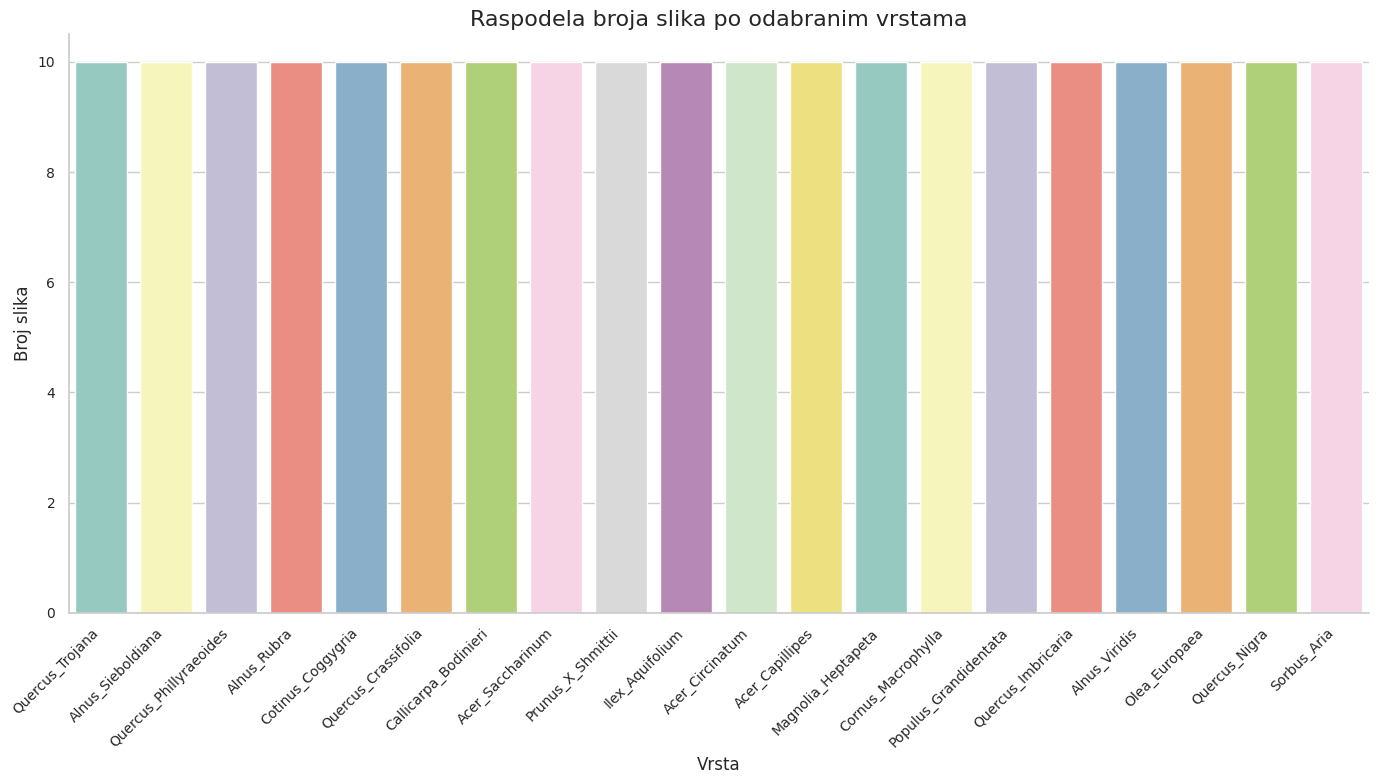

In [9]:
# Izdvajanje jedinstvenih vrsta iz train_data
unique_species = train_data['species'].unique().tolist()

# Selektujemo 20 random vrsta
random_species = random.sample(unique_species, 20)

# Filtriramo df da sadrži samo izabrane vrste (da sadrži samo redove koji pripadaju
# odabranim nasumično izabranim vrstama)
filtered_df = train_data[train_data['species'].isin(random_species)]

# Postavljamo stil uz pomoć ugrađene set funkcije u okviru seaborn-a
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))  # Povećavanje veličine grafikona

# Koristi countplot za prikaz raspodele
sns.countplot(data=filtered_df, x='species', palette='Set3')

plt.title('Raspodela broja slika po odabranim vrstama', fontsize=16)
plt.xlabel('Vrsta', fontsize=12)
plt.ylabel('Broj slika', fontsize=12)

# Rotiramo za 45 stepeni zbog bolje čitkosti
plt.xticks(rotation=45, ha='right', fontsize=10)

# Povećavamo font size
plt.yticks(fontsize=10)

sns.despine()

# Prikaz
plt.tight_layout()
plt.show()

**Vizuelizacija slika**

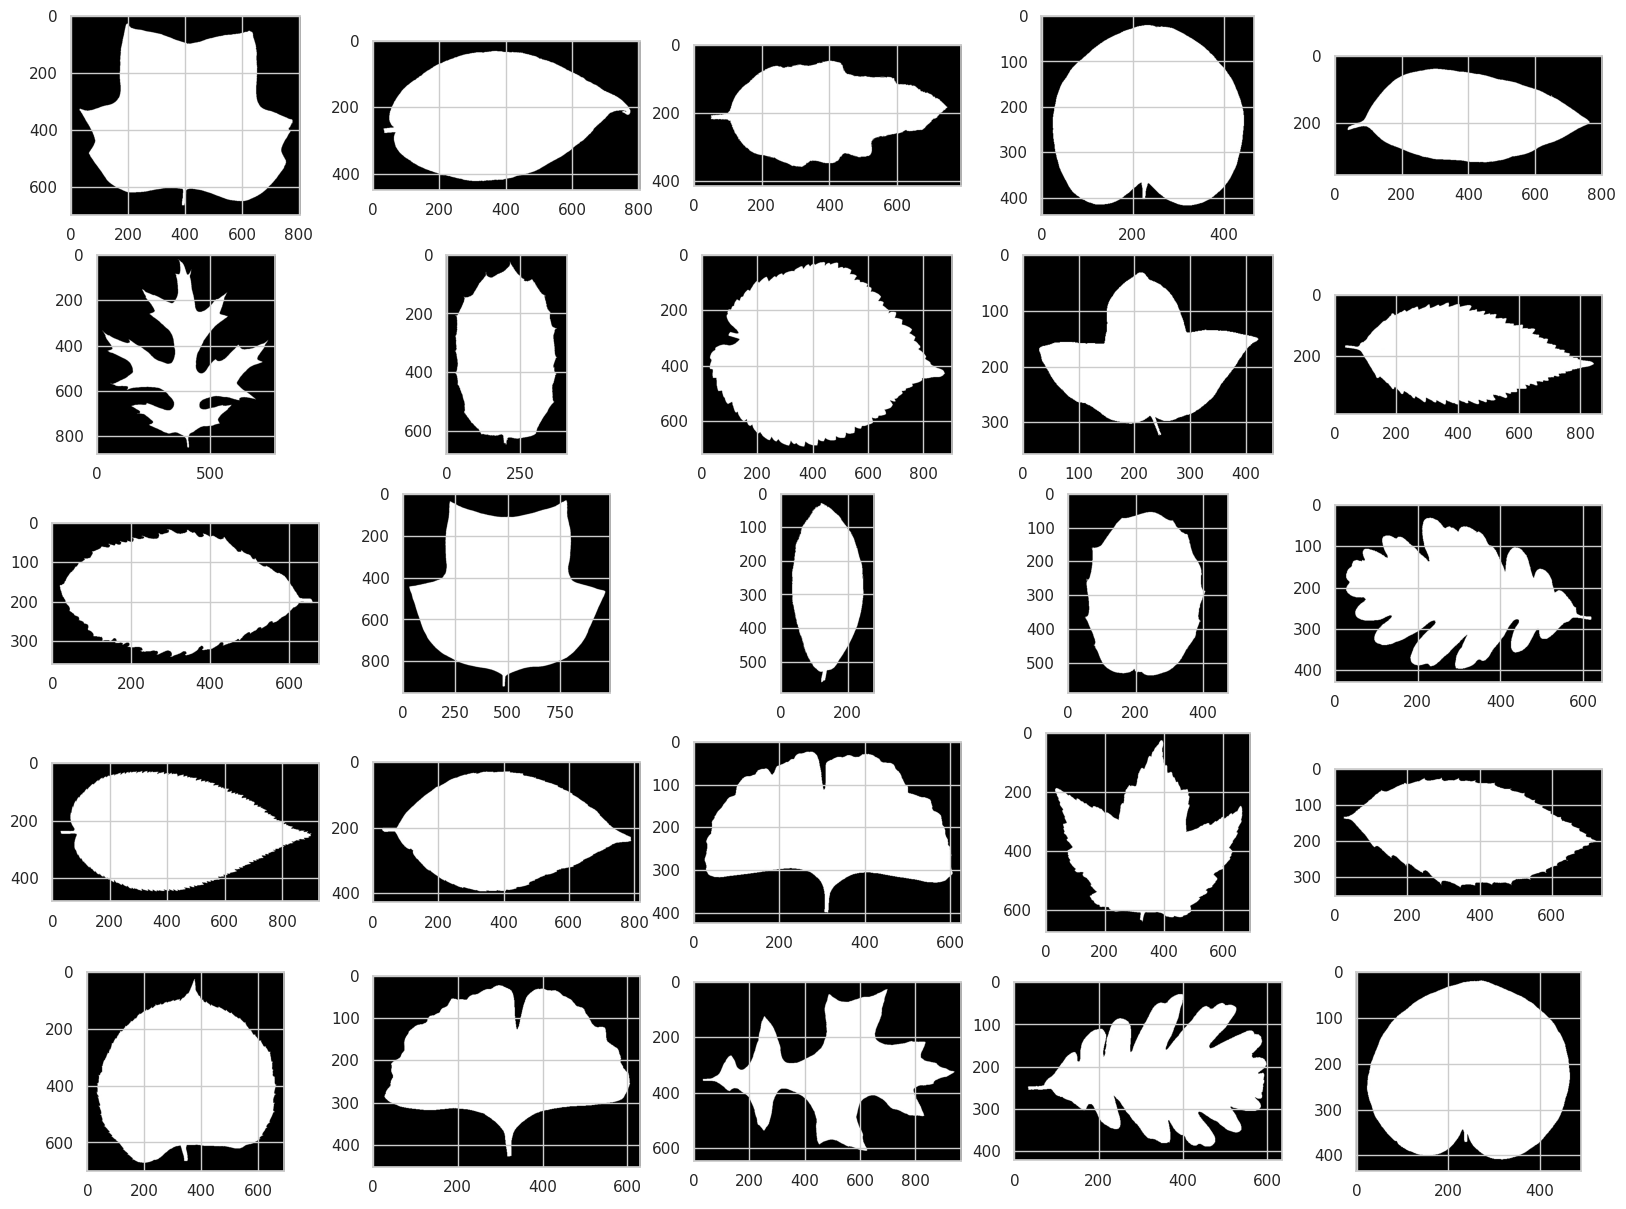

In [10]:
# Prikaz 25 nasumično odabranih slika
plt.figure(figsize=(20, 15)) #kreira se pomoću figure() objekat za prikaz sa zadatim dimenzijama

for i in range(25):
    # Nasumično odaberi sliku iz direktorijuma
    random_image = random.choice(os.listdir(images_dir))

    plt.subplot(5, 5, i + 1)

    # Učitavanje slike
    img_path = os.path.join(images_dir, random_image)
    img = load_img(img_path)

    # Prikaz slike
    plt.imshow(img)

# Prikaz grafikona
plt.show()

1. Učitavanje slika - prvo se slike učitavaju iz odgovarajućeg direktorijuma i na taj način se obezbeđuje pristup podacima
2. Promena veličine slike - sve slike se skaliraju na istu veličinu jer je važno da slike budu istog formata i veličine pre primene neuronskih mreža(što smo u prethodnom koraku videli da nije slučaj, pa je potrebno prilagoditi)
3. Prikaz slika pre i posle augmentacije - vizuelizacija slika
4. Augmentacija slika - tehnika koja se koristi za povećavanje raznolikosti trening skupa podataka. Može da uključuje različite transformacije kao što su rotacija, horizontalno i vertikalno pomeranje... Za klasifikaciju listova može biti korisno jer može pomoći u generisanju dodatnih primera slika koje su varijacije istih listova

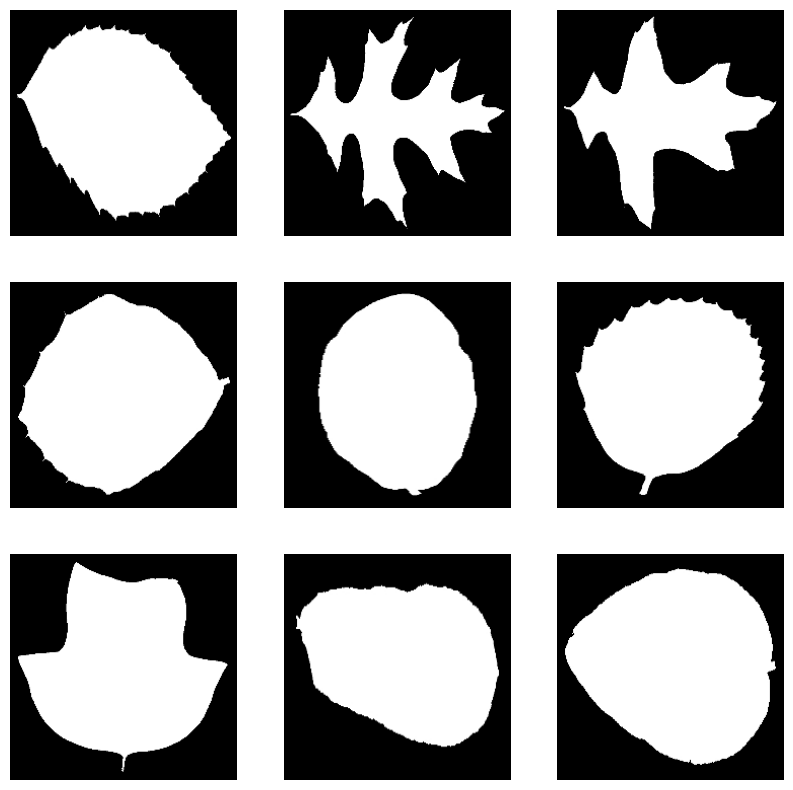

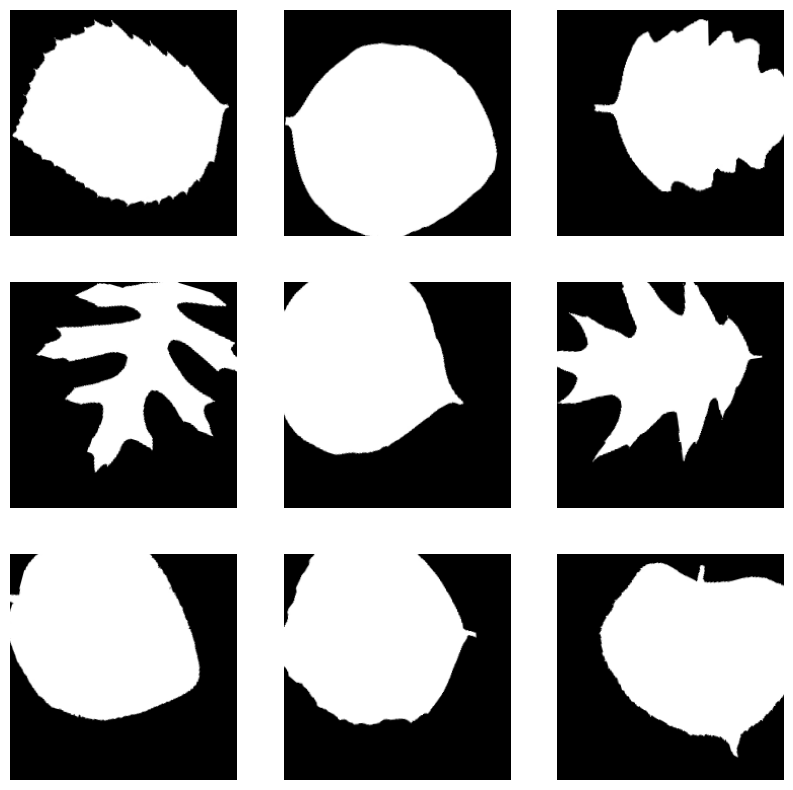

In [11]:
# Kreiranje liste za čuvanje slika
images = []

# Iteracija kroz slike u direktorijumu
for filename in os.listdir(images_dir):
    img_path = os.path.join(images_dir, filename)

    # Učitavanje slike
    img = cv2.imread(img_path)

    # Promena veličine slike (na primer, na 224x224 piksela)
    resized_img = cv2.resize(img, (224, 224))

    images.append(resized_img)

# Prikaz primera slika pre augmentacije
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# Pretvaranje u numpy niz
images_array = np.array(images)

# Kreiranje objekta ImageDataGenerator sa željenim transformacijama
data_generator = ImageDataGenerator(
    rotation_range=20,  # Nasumična rotacija između 0 i 20 stepeni
    width_shift_range=0.2,  # Nasumično horizontalno pomeranje za 20% širine slike
    height_shift_range=0.2,  # Nasumično vertikalno pomeranje za 20% visine slike
    horizontal_flip=True,  # Nasumično horizontalno flipovanje
    vertical_flip=True,  # Nasumično vertikalno flipovanje
)

# Primenite augmentaciju na slike
augmented_images = data_generator.flow(images_array, shuffle=False)

# Prikaz primera augmentovanih slika
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i][0].astype('uint8'))  # Prikazivanje prvog elementa u batch-u
    plt.axis('off')
plt.show()


## Filtriranje podataka

Prilikom učitavanja podataka iz csv fajla, možemo primeniti da neke slike nedostaju odnosno određene 'id' vrednosti

In [12]:
# Konvertovanje identifikatora slika iz train_data u string (broj u string)
image_ids_train_data = train_data['id'].astype(str)

# Konvertovanje identifikatora slika iz train_data u brojeve
image_ids_train_data_numeric = image_ids_train_data.astype(int)

# pronalaženje identifikatora koji se nalaze u train_data ali nisu u images_dir
missing_image_ids = set(image_ids_train_data_numeric) - set(images_dir)

# Ispisivanje identifikatora koji nedostaju
print("Identifikatori slika koji nedostaju:", missing_image_ids)

Identifikatori slika koji nedostaju: {1, 2, 3, 5, 6, 8, 10, 11, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 29, 30, 31, 32, 34, 35, 37, 38, 40, 42, 43, 45, 48, 49, 50, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 69, 71, 72, 73, 75, 76, 78, 80, 81, 82, 83, 84, 85, 87, 88, 92, 100, 101, 103, 106, 107, 108, 109, 115, 116, 118, 120, 122, 124, 127, 129, 130, 132, 133, 134, 139, 140, 142, 143, 145, 146, 148, 149, 152, 153, 155, 160, 163, 164, 165, 166, 167, 168, 169, 171, 173, 175, 178, 179, 183, 186, 188, 189, 190, 194, 196, 198, 199, 201, 202, 203, 204, 206, 211, 212, 214, 215, 216, 217, 218, 219, 224, 225, 227, 228, 231, 233, 235, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 252, 253, 256, 257, 258, 259, 260, 262, 263, 265, 267, 268, 269, 270, 273, 275, 278, 280, 282, 283, 286, 288, 289, 290, 291, 294, 298, 302, 303, 304, 306, 307, 309, 310, 311, 314, 315, 317, 319, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 333, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 348, 34

Proverićemo da li su sve id vrednosti jedinstvene, da li postoje duplikati. To može uticati na konzistentnost podataka, tačnost modela, efikasnost obrade podataka i sl.

In [13]:
# Učitavanje ID-ova
ids = pd.read_csv(train_csv_path, usecols=["id"])

# Provjera duplikata
duplicates = ids.duplicated()

# Ispis duplikata
if duplicates.any():
    print("Pronađeni su duplikati ID-ova:", duplicates[duplicates])
else:
    print("Ne postoje duplikati ID-ova.")

Ne postoje duplikati ID-ova.


Obezbeđujemo da se koriste samo dostupni podaci

In [14]:
# Identifikatori slika koje imamo
existing_image_ids = set(image_ids_train_data_numeric) - missing_image_ids

# Filtriranje train_data samo za postojeće slike
existing_images_data = train_data[train_data['id'].isin(existing_image_ids)]

# Učitavanje slika koje postoje u direktorijumu
existing_images = []
existing_labels = []

for index, row in existing_images_data.iterrows():
    img_path = os.path.join(images_dir, f"{row['id']}.jpg")
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (224, 224))
    existing_images.append(resized_img)
    existing_labels.append(row['species'])

# Dodavanje postojećih slika i oznaka u images_array i labels
images_array = np.array(existing_images)
labels = np.array(existing_labels)


## Podela podataka za obuku

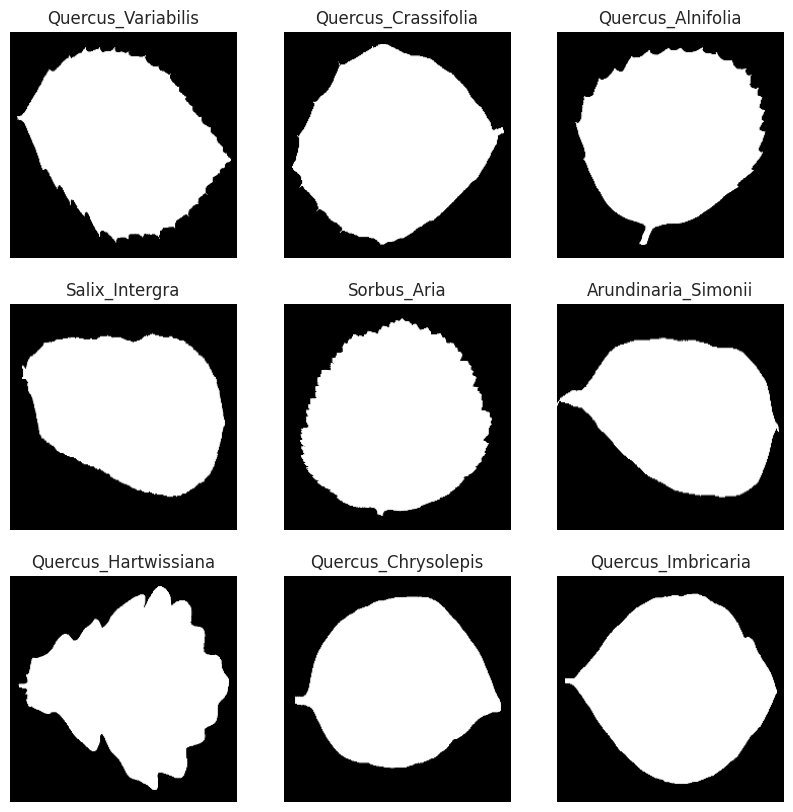

In [16]:
# Prikaz prvih nekoliko slika sa odgovarajućim oznakama
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_array[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# Podela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(images_array, labels, test_size=0.2, random_state=42)

In [17]:
# Kreiranje objekta LabelEncoder
label_encoder = LabelEncoder()

# Konvertovanje tekstualnih oznaka u numeričke vrednosti
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Pretvaranje numeričkih oznaka u one-hot kodiranje
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Normalizacija podataka
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Prikaz dimenzija nakon normalizacije
print("Dimenzije X_train_normalized:", X_train_normalized.shape)
print("Dimenzije X_test_normalized:", X_test_normalized.shape)

# Prikaz dimenzija nakon pretvaranja u one-hot kodiranje
print("Dimenzije y_train_one_hot:", y_train_one_hot.shape)
print("Dimenzije y_test_one_hot:", y_test_one_hot.shape)


Dimenzije X_train_normalized: (792, 224, 224, 3)
Dimenzije X_test_normalized: (198, 224, 224, 3)
Dimenzije y_train_one_hot: (792, 99)
Dimenzije y_test_one_hot: (198, 99)


## MODEL

* ***MobileNetV2*** konvolutivna neuronska mreža - koristi se u zadacima prepoznavanja slika, posebno na uređajima sa ograničenim resursima, gde se postiže dobar balans između tačnosti i brzine. Ova arhitektura se često primenjuje i u transfer learning scenarijima, gde se model trenira na velikom skupu podataka, a zatim prilagođava specifičnim zadacima.

In [20]:
# Definisanje broja klasa
num_classes = 99

# Postavljanje dimenzija slike (u ovom primeru 224x224 piksela)
input_shape = (224, 224, 3)

# Učitavanje pre-treniranog modela MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Zamrzavanje svih slojeva
for layer in base_model.layers:
    layer.trainable = False

# Dodavanje novih slojeva
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Kreiranje novog modela
model = Model(inputs=base_model.input, outputs=predictions)

# Kompajliranje modela
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [21]:
# Treniranje modela
history = model.fit(X_train_normalized, y_train_one_hot, epochs=10, validation_data=(X_test_normalized, y_test_one_hot))

Epoch 1/10
25/25 [==============================] - 50s 2s/step - loss: 3.5817 - accuracy: 0.2525 - val_loss: 2.0336 - val_accuracy: 0.4848
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 1.2244 - accuracy: 0.7008 - val_loss: 1.1738 - val_accuracy: 0.6717
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.6542 - accuracy: 0.8346 - val_loss: 1.0629 - val_accuracy: 0.7222
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 0.4573 - accuracy: 0.8914 - val_loss: 0.6974 - val_accuracy: 0.7980
Epoch 5/10
25/25 [==============================] - 38s 2s/step - loss: 0.2828 - accuracy: 0.9407 - val_loss: 0.5486 - val_accuracy: 0.8434
Epoch 6/10
25/25 [==============================] - 38s 2s/step - loss: 0.2358 - accuracy: 0.9444 - val_loss: 0.4887 - val_accuracy: 0.8636
Epoch 7/10
25/25 [==============================] - 38s 2s/step - loss: 0.1529 - accuracy: 0.9646 - val_loss: 0.5094 - val_accuracy: 0.8384
Epoch 8/10
25/25 [==

Analiza rezultata:
- *Epoch* predstavlja jednu kompletnu iteraciju preko celog skupa podataka za treniranje
- *Loss (gubitak)* je mera koliko su predviđanja modela daleko od stvarnih oznaka u vašem skupu podataka. Niža vrednost gubitka obično znači da model bolje predviđa. U ovom slučaju gubitak je smanjen sa 3.5817 na 0.0842 tokom treniranja, što je značajno poboljšanje
- *Accuracy (preciznost)* predstavlja meru tačnih predviđanja prema ukupnom broju predviđanja. U ovom slučaju preciznost je porasla sa 0.2525 na 0.9798, što znači da model sada tačno klasifikuje gotovo 98% slika u skupu podataka za treniranje
- *Val_loss i Val_accuracy:* ove vrednosti se odnose na skup podataka za validaciju. Validacijski skup se ne koristi za treniranje modela, već za procenu njegove generalizacije na nove podatke. Važno je da i validacijska preciznost pokazuje značajno poboljšanje, što znači da model ne samo da uči podatke za treniranje, već ih i generalizira na nepoznate podatke.

Vizualizacija gubitka i preciznosti tokom treniranja

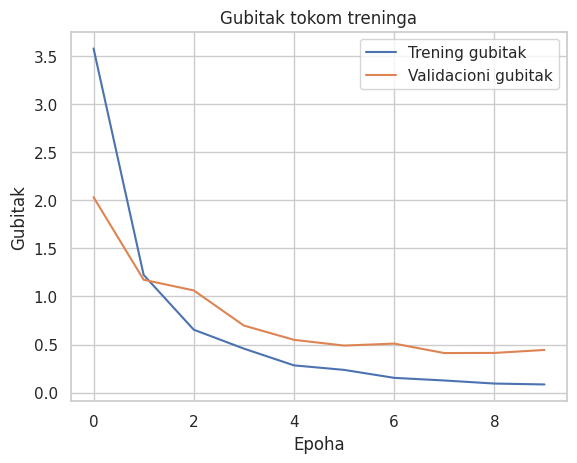

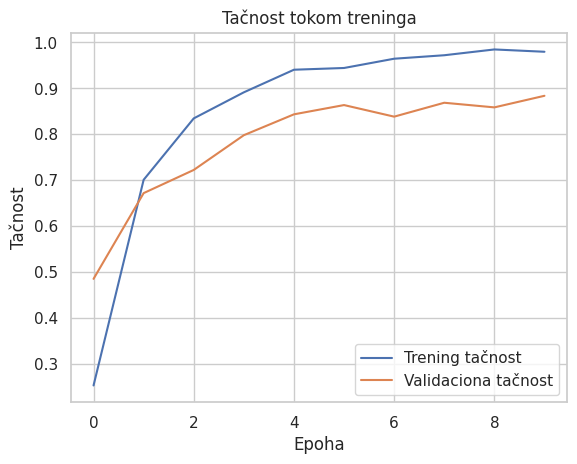

In [22]:
import matplotlib.pyplot as plt

# Prikazivanje grafika gubitka tokom epoha
plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacioni gubitak')
plt.title('Gubitak tokom treninga')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

# Prikazivanje grafika tačnosti tokom epoha
plt.plot(history.history['accuracy'], label='Trening tačnost')
plt.plot(history.history['val_accuracy'], label='Validaciona tačnost')
plt.title('Tačnost tokom treninga')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.legend()
plt.show()

In [23]:
# Ispisivanje tačnosti i preciznosti u procentima
train_accuracy = history.history['accuracy'][-1] * 100
validation_accuracy = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
validation_loss = history.history['val_loss'][-1]

print(f'Konačna tačnost na trening skupu: {train_accuracy:.2f}%')
print(f'Konačna tačnost na validacionom skupu: {validation_accuracy:.2f}%')
print(f'Konačni gubitak na trening skupu: {train_loss:.4f}')
print(f'Konačni gubitak na validacionom skupu: {validation_loss:.4f}')

Konačna tačnost na trening skupu: 97.98%
Konačna tačnost na validacionom skupu: 88.38%
Konačni gubitak na trening skupu: 0.0842
Konačni gubitak na validacionom skupu: 0.4433


Predikcije augmentovanih slika

In [25]:
# Generisanje augmentovanih slika za testni skup
augmented_test_images = data_generator.flow(X_test_normalized, y_test_one_hot, shuffle=False)

# Predikcija na augmentovanim slikama
predictions = model.predict(augmented_test_images)

# Izračunavanje tačnosti
test_accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test_one_hot, axis=1))

# Ispis rezultata tačnosti u procentima
print(f"Test tačnost na augmentovanom skupu: {test_accuracy * 100:.2f}%")

7/7 [==============================] - 11s 1s/step
Test tačnost na augmentovanom skupu: 50.00%


In [26]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

def predictions(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)

    class_index = np.argmax(preds[0])
    confidence = preds[0][class_index]

    classes = list(train_data['species'].unique())
    predicted_class = classes[class_index]

    print(f'Predikcija: {predicted_class}, Poverenje: {confidence:.2%}')

    # Prikazivanje slike
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

1/1 [==============================] - 1s 1s/step
Predikcija: Tilia_Tomentosa, Poverenje: 28.79%


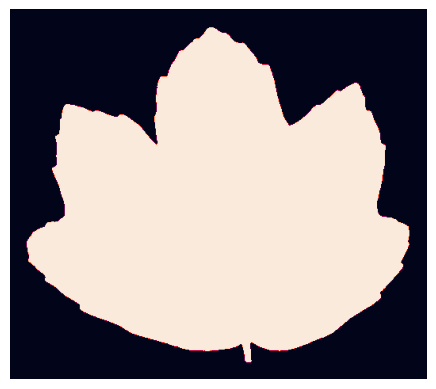

1/1 [==============================] - 0s 198ms/step
Predikcija: Populus_Adenopoda, Poverenje: 42.75%


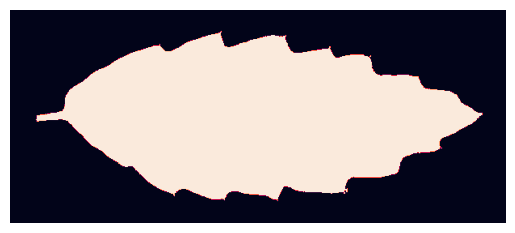

1/1 [==============================] - 0s 152ms/step
Predikcija: Quercus_Shumardii, Poverenje: 30.46%


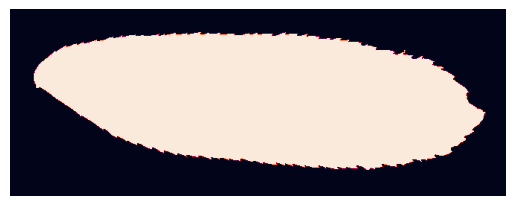

1/1 [==============================] - 0s 178ms/step
Predikcija: Cytisus_Battandieri, Poverenje: 15.30%


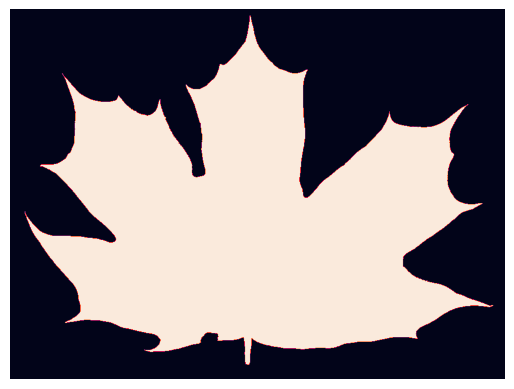

In [27]:
# Primer poziva funkcije
predictions("/content/drive/MyDrive/Leaf_Classification/images/1.jpg")
predictions("/content/drive/MyDrive/Leaf_Classification/images/131.jpg")
predictions("/content/drive/MyDrive/Leaf_Classification/images/2.jpg")
predictions("/content/drive/MyDrive/Leaf_Classification/images/279.jpg")

**InceptionV3** je duboki neuronski model koji se koristi za klasifikaciju slika.

Ključne karakteristike modela:

- Arhitektura Inception module-a: Osnovna ideja InceptionV3 modela je upotreba više različitih veličina konvolucije (3x3, 5x5, itd.) istovremeno kako bi se modelu omogućilo učenje features-a na različitim nivoima apstrakcije.

- Dubina mreže: InceptionV3 jemodel sa mnogo slojeva. Ima više od 40 konvolucijskih slojeva,

- Transferno učenje: InceptionV3 često koristi transferno učenje, što znači da se model prvo trenira na velikom skupu podataka poput ImageNet-a, a zatim se finišira (tj. ponovno trenira) na manjem skupu podataka specifičnom za određenu primenu

- Efikasnost: InceptionV3 je dizajniran da bude relativno efikasan, što znači da može postići visoke performanse sa manje resursa u poređenju sa nekim drugim dubokim modelima, poput VGG ili ResNet.

InceptionV3 se često koristi za zadatke kao što su klasifikacija slika, detekcija objekata i segmentacija slika, i često se koristi u aplikacijama koje zahtevaju prepoznavanje slika, poput prepoznavanja lica, analize medicinskih slika i automatizovanog prepoznavanja predmeta.

In [30]:
from tensorflow.keras.applications import InceptionV3

# Učitavanje pre-treniranog modela InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Dodavanje novih slojeva
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Kreiranje novog modela
model = Model(inputs=base_model.input, outputs=predictions)

# Kompajliranje modela
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 1s 0us/step


Epoch 1/10
25/25 [==============================] - 398s 15s/step - loss: 4.1765 - accuracy: 0.1162 - val_loss: 12.8331 - val_accuracy: 0.0051
Epoch 2/10
25/25 [==============================] - 347s 14s/step - loss: 2.2839 - accuracy: 0.3662 - val_loss: 9.9087 - val_accuracy: 0.0101
Epoch 3/10
25/25 [==============================] - 365s 15s/step - loss: 1.5631 - accuracy: 0.5505 - val_loss: 8.9425 - val_accuracy: 0.0960
Epoch 4/10
25/25 [==============================] - 347s 14s/step - loss: 1.2887 - accuracy: 0.6010 - val_loss: 20.6181 - val_accuracy: 0.0556
Epoch 5/10
25/25 [==============================] - 345s 14s/step - loss: 0.9756 - accuracy: 0.6957 - val_loss: 30.4882 - val_accuracy: 0.0404
Epoch 6/10
25/25 [==============================] - 350s 14s/step - loss: 0.7603 - accuracy: 0.7689 - val_loss: 6.8510 - val_accuracy: 0.2172
Epoch 7/10
25/25 [==============================] - 349s 14s/step - loss: 0.6232 - accuracy: 0.8005 - val_loss: 8.2442 - val_accuracy: 0.1768
Epo

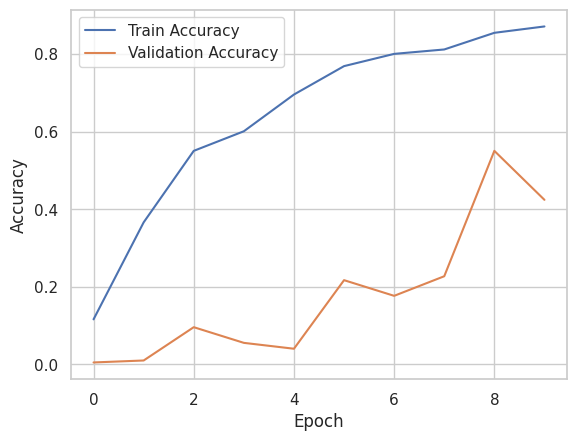

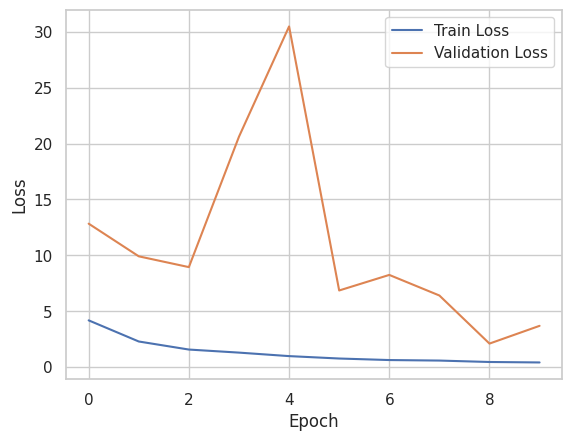

In [31]:
# Treniranje modela
history = model.fit(X_train_normalized, y_train_one_hot, epochs=10, validation_data=(X_test_normalized, y_test_one_hot))

# Vizualizacija rezultata
import matplotlib.pyplot as plt

# Prikaz tačnosti i gubitka tokom epoha
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Analiza rezultata treninga InceptionV3 modela:

Pozitivni aspekti:

Učenje na trening skupu: Model uči i poboljšava svoje performanse tokom treninga. Gubitak se smanjuje, a tačnost raste na trening skupu.

Drugi aspekti:

Početni gubitak je visok, a tačnost niska, što ukazuje da modelu treba više vremena da se prilagodi na zadatak.
Nestabilna validacijska tačnost: Tačnost na validacijskom skupu oscilira i ne pokazuje stabilan trend rasta. U nekim epohama je čak i niža od 1%.
Razmak između trening i validacije: Postoji značajan razmak između tačnosti i gubitka na trening i validacijskom skupu, što može ukazivati na preobučavanje modela.

Uporedni prikaz pojedinih aspekata kod modela:

Tačnost (validacijska tačnost)
* MobileNetV2 - 88.38%
* InceptionV3 - 42.42%

Nestabilna validacijska tačnost kod InceptionV3 može ukazivati na preobučavanje

Brzina treninga
* MobileNetV2 - brže treniranje (oko 35 sekundi po epohi)
* InceptionV3 - sporije treniranje (oko 345 sekundi po epohi)

Složenost
* MobileNetV2 - manji model s manje parametara
* InceptionV3 - veći model s više parametara

# ZAKLJUČAK

MobileNetV2 i InceptionV3 su popularni modeli dubokog učenja koji su poznati po svojoj efikasnosti i sposobnosti generalizacije na različite zadatke prepoznavanja slika, zbog čega su i odabrani za ovaj projekat.
MobileNetV2 je sa svojom jednostavnijom arhitekturom i dobrom brzinom izvršavanja postigao bolje rezultate u ovom konkretnom zadatku, sa visokom tačnošću i generalizacijom na validacionom skupu podataka, dok je InceptionV3 pored složenije arhitekture rezultirao nižim performansama što može biti posledica kako njegove arhitekture, tako i potrebe za više podataka prilikom treniranja.